# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
#acho que nao entendi bem como fazer essas questoes, porem segue minha solucao
sinasc_raw['munResLatCat'] = sinasc_raw['munResLat'].apply(lambda x: 'Faixa Norte' if x > (-10.5) else 'Faixa Sul')

#estatisticas para quantidade de filhos mortos
sinasc_raw.groupby('munResLatCat')['QTDFILMORT'].agg(['sum', 'mean', 'max', 'median', 'std', 'var'])

,sum,mean,max,median,std,var
munResLatCat,,,,,,
Faixa Norte,3538.0,0.29177,9.0,0.0,0.627856,0.394204
Faixa Sul,3106.0,0.24258,28.0,0.0,0.599444,0.359333


In [5]:
#estatisticas para idade do pai
sinasc_raw.groupby('munResLatCat')['IDADEPAI'].agg(['sum', 'mean', 'max', 'median', 'std', 'var'])

,sum,mean,max,median,std,var
munResLatCat,,,,,,
Faixa Norte,38038.0,32.126689,73.0,31.0,8.034214,64.548602
Faixa Sul,198482.0,30.901759,86.0,30.0,7.707202,59.400967


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_raw['munResAreaCat'] = sinasc_raw['munResArea'].apply(lambda x: 'Municipios extensos' if x > 3000 else 'Municipios acanhados')

#estatisticas para quantidade de filhos vivos
sinasc_raw.groupby('munResAreaCat')['QTDFILVIVO'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])                                                   

,sum,mean,min,max,median,std,var
munResAreaCat,,,,,,,
Municipios acanhados,4774.0,0.924298,0.0,30.0,1.0,1.075338,1.156352
Municipios extensos,22053.0,1.086890,0.0,14.0,1.0,1.191750,1.420268


In [7]:
#estatisticas para idade da mae
sinasc_raw.groupby('munResAreaCat')['IDADEMAE'].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

,sum,mean,min,max,median,std,var
munResAreaCat,,,,,,,
Municipios acanhados,137413,26.324330,11,53,26.0,6.305013,39.753192
Municipios extensos,567848,26.038518,12,53,25.0,6.405497,41.030387


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [9]:
sinasc_raw['munResAltCat'] = sinasc_raw['munResAlt'].apply(lambda x: 'Municipios elevados' if x > 153 else 'Municipios baixos (alt)')

#estatisticas para peso
sinasc_raw.groupby('munResAltCat')['PESO'].agg(['sum', 'mean', 'max', 'median', 'std', 'var']) 

,sum,mean,max,median,std,var
munResAltCat,,,,,,
Municipios baixos (alt),44232619,3246.907363,5135,3280.0,559.845469,313426.948839
Municipios elevados,43424338,3239.413502,5985,3265.0,528.970526,279809.817887


In [10]:
#estatisticas para indice Kotelchuck
sinasc_raw.groupby('munResAltCat')['KOTELCHUCK'].agg(['sum', 'mean', 'max', 'median', 'std', 'var']) 

,sum,mean,max,median,std,var
munResAltCat,,,,,,
Municipios baixos (alt),72918,5.352566,9,5.0,2.464453,6.073530
Municipios elevados,61545,4.591197,9,5.0,1.466623,2.150982


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '(Porto Velho, 2019-08-19)'),
  Text(0.0, 0, '(Ariquemes, 2019-01-01)'),
  Text(500.0, 0, '(Cacoal, 2019-05-16)'),
  Text(1000.0, 0, '(Jaru, 2019-10-03)'),
  Text(1500.0, 0, '(Porto Velho, 2019-02-19)'),
  Text(2000.0, 0, '(Vilhena, 2019-07-04)'),
  Text(2500.0, 0, '')])

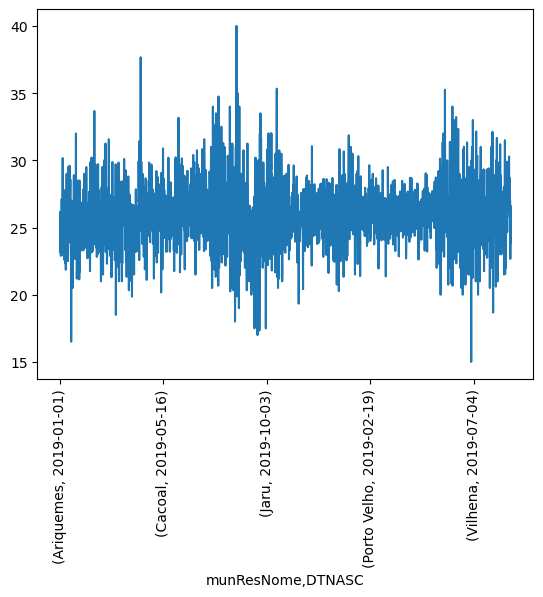

In [12]:
sinasc_mun = sinasc_raw.set_index('munResNome')
sinasc_mun.groupby([imediatas, 'DTNASC'])['IDADEMAE'].mean().plot()
plt.xticks(rotation=90)

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [13]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [14]:
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [15]:
bins = [0, 0.6, 0.7, 1]
labels = ['IDH-BAIXO', 'IDH-MEDIO', 'IDH-ALTO']
dados_ro['idh_cat'] = pd.cut(dados_ro['idh'], bins=bins, labels=labels)

dados_ro['ifdm_cat'] = dados_ro['ifdm'].apply(lambda x: 'Desenvolvimento Regular' if x < 0.6 else 'Desenvolvimento Moderado')

bins = [0, 100000, 200000, 300000, 500000, 1000000, 100000000]
labels = ['Até 100 milhoes', 'Acima de 100 milhoes', 'Acima de 200 milhoes', 'Acima de 300 milhoes', 'Acima de 500 milhoes', 'Acima de 1 bilhao']
dados_ro['pib_cat'] = pd.cut(dados_ro['pib'], bins=bins, labels=labels)
dados_ro.head()

,municipio,regiao,idh,ifdm,pib,idh_cat,ifdm_cat,pib_cat
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,IDH-MEDIO,Desenvolvimento Moderado,Acima de 300 milhoes
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,IDH-BAIXO,Desenvolvimento Regular,Acima de 200 milhoes
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,IDH-MEDIO,Desenvolvimento Regular,Acima de 300 milhoes
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,IDH-MEDIO,Desenvolvimento Regular,Acima de 200 milhoes
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,IDH-ALTO,Desenvolvimento Moderado,Acima de 1 bilhao


In [16]:
idh_map = dict(zip(dados_ro['municipio'], dados_ro['idh_cat']))
ifdm_map = dict(zip(dados_ro['municipio'], dados_ro['ifdm_cat']))
pib_map = dict(zip(dados_ro['municipio'], dados_ro['pib_cat']))

In [17]:
#agrupamentos
#idades
sinasc_mun.groupby(idh_map)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

IDADEMAE                                                 IDADEPAI  \
                sum       mean min max median       std        var       sum   
munResNome                                                                     
IDH-ALTO     418296  26.261678  12  47   26.0  6.415538  41.159121  114731.0   
IDH-BAIXO     46247  25.326944  13  46   25.0  6.194908  38.376885   13686.0   
IDH-MEDIO    240694  25.956433  11  53   25.0  6.361998  40.475021  108081.0   

                                                               
                 mean   min   max median       std        var  
munResNome                                                     
IDH-ALTO    31.236319  15.0  70.0   30.0  7.796585  60.786731  
IDH-BAIXO   30.617450  16.0  58.0   30.0  7.417345  55.017004  
IDH-MEDIO   31.004303  16.0  86.0   30.0  7.786626  60.631545

In [18]:
#APGAR5 / PESO
sinasc_mun.groupby(idh_map)[['APGAR5', 'PESO']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

APGAR5                                                  \
                 sum      mean  min   max median       std       var   
munResNome                                                             
IDH-ALTO    145605.0  9.176015  0.0  10.0    9.0  0.757201  0.573353   
IDH-BAIXO    16694.0  9.172527  1.0  10.0    9.0  0.860797  0.740971   
IDH-MEDIO    84840.0  9.185795  0.0  10.0    9.0  0.831251  0.690977   

                PESO                                              \
                 sum         mean  min   max  median         std   
munResNome                                                         
IDH-ALTO    51716855  3246.914553  292  5480  3275.0  554.013292   
IDH-BAIXO    5900639  3231.456188  500  5065  3252.5  539.129681   
IDH-MEDIO   30036248  3239.107948  258  5985  3265.0  529.631341   

                           
                      var  
munResNome                 
IDH-ALTO    306930.728242  
IDH-BAIXO   290660.812600  
IDH-MEDIO   280509.357306

In [19]:
#ESCOLARIDADE DA MAE
sinasc_mun.groupby([idh_map, 'ESCMAE'])['ESCMAE'].count()

munResNome  ESCMAE         
IDH-ALTO    1 a 3 anos          280
            12 anos ou mais    3848
            4 a 7 anos         2675
            8 a 11 anos        8890
            Nenhuma              23
IDH-BAIXO   1 a 3 anos           49
            12 anos ou mais     222
            4 a 7 anos          421
            8 a 11 anos        1112
            Nenhuma               3
IDH-MEDIO   1 a 3 anos          187
            12 anos ou mais    1697
            4 a 7 anos         1664
            8 a 11 anos        5630
            Nenhuma              14
Name: ESCMAE, dtype: int64

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [20]:
#idades
sinasc_mun.groupby(ifdm_map)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

IDADEMAE                                      \
                              sum       mean min max median       std   
munResNome                                                              
Desenvolvimento Moderado   575493  26.223139  12  53   26.0  6.385869   
Desenvolvimento Regular    129744  25.535131  11  52   25.0  6.363435   

                                     IDADEPAI                                \
                                var       sum       mean   min   max median   
munResNome                                                                    
Desenvolvimento Moderado  40.779325  193359.0  31.061687  15.0  70.0   30.0   
Desenvolvimento Regular   40.493303   43139.0  31.237509  16.0  86.0   30.0   

                                               
                               std        var  
munResNome                                     
Desenvolvimento Moderado  7.714357  59.511297  
Desenvolvimento Regular   8.022527  64.360940

In [21]:
#APGAR5 / PESO
sinasc_mun.groupby(ifdm_map)[['APGAR5', 'PESO']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

APGAR5                                        \
                               sum      mean  min   max median       std   
munResNome                                                                 
Desenvolvimento Moderado  200857.0  9.185394  0.0  10.0    9.0  0.773676   
Desenvolvimento Regular    46282.0  9.152066  0.0  10.0    9.0  0.859384   

                                        PESO                                  \
                               var       sum         mean  min   max  median   
munResNome                                                                     
Desenvolvimento Moderado  0.598574  71180107  3243.420532  258  5720  3274.0   
Desenvolvimento Regular   0.738541  16473635  3242.203306  425  5985  3270.0   

                                                     
                                 std            var  
munResNome                                           
Desenvolvimento Moderado  547.829184  300116.814304  
Desenvolvimento Regular   531.374264  282358.608855

In [22]:
#ESCOLARIDADE DA MAE
sinasc_mun.groupby([ifdm_map, 'ESCMAE'])['ESCMAE'].count()

munResNome                ESCMAE         
Desenvolvimento Moderado  1 a 3 anos           395
                          12 anos ou mais     5086
                          4 a 7 anos          3656
                          8 a 11 anos        12506
                          Nenhuma               30
Desenvolvimento Regular   1 a 3 anos           121
                          12 anos ou mais      681
                          4 a 7 anos          1104
                          8 a 11 anos         3126
                          Nenhuma               10
Name: ESCMAE, dtype: int64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [23]:
#idades
sinasc_mun.groupby(pib_map)[['IDADEMAE', 'IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

IDADEMAE                                                 \
                          sum       mean min max median       std        var   
munResNome                                                                     
Acima de 1 bilhao      465846  26.265562  12  47   26.0  6.403777  41.008357   
Acima de 100 milhoes    50094  25.662910  12  52   25.0  6.306384  39.770474   
Acima de 200 milhoes    18334  25.323204  13  44   25.0  6.064473  36.777829   
Acima de 300 milhoes    48567  25.833511  11  53   25.0  6.273901  39.361835   
Acima de 500 milhoes   110968  25.782528  13  53   25.0  6.469479  41.854159   
Até 100 milhoes         11428  26.515081  14  41   26.0  5.925831  35.115470   

                      IDADEPAI                                          \
                           sum       mean   min   max median       std   
munResNome                                                               
Acima de 1 bilhao     144654.0  31.108387  15.0  70.0   30.0  7.767477   
Acima de 100 milhoes   21047.0  31.602102  17.0  73.0   30.0  7.954339   
Acima de 200 milhoes    8964.0  30.386441  16.0  55.0   30.0  7.739365   
Acima de 300 milhoes   19257.0  30.183386  16.0  64.0   29.0  7.415833   
Acima de 500 milhoes   34048.0  31.322907  16.0  86.0   31.0  7.863105   
Até 100 milhoes         8528.0  31.585185  17.0  67.0   30.0  7.694333   

                                 
                            var  
munResNome                       
Acima de 1 bilhao     60.333700  
Acima de 100 milhoes  63.271514  
Acima de 200 milhoes  59.897775  
Acima de 300 milhoes  54.994574  
Acima de 500 milhoes  61.828416  
Até 100 milhoes       59.202754

In [24]:
#APGAR5 / PESO
sinasc_mun.groupby(pib_map)[['APGAR5', 'PESO']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])  

APGAR5                                        \
                           sum      mean  min   max median       std   
munResNome                                                             
Acima de 1 bilhao     162013.0  9.166223  0.0  10.0    9.0  0.754588   
Acima de 100 milhoes   17823.0  9.168210  1.0  10.0    9.0  0.769328   
Acima de 200 milhoes    6708.0  9.265193  1.0  10.0    9.0  0.880936   
Acima de 300 milhoes   17049.0  9.078275  0.0  10.0    9.0  0.893203   
Acima de 500 milhoes   39610.0  9.272004  0.0  10.0    9.0  0.851944   
Até 100 milhoes         3936.0  9.132251  0.0  10.0    9.0  0.951696   

                                    PESO                                  \
                           var       sum         mean  min   max  median   
munResNome                                                                 
Acima de 1 bilhao     0.569403  57592618  3247.215719  292  5720  3275.0   
Acima de 100 milhoes  0.591866   6341124  3248.526639  425  4810  3262.5   
Acima de 200 milhoes  0.776048   2339562  3231.439227  930  4855  3245.0   
Acima de 300 milhoes  0.797812   6064539  3225.818617  258  4980  3270.0   
Acima de 500 milhoes  0.725809  13942619  3239.456087  285  5985  3275.0   
Até 100 milhoes       0.905725   1373280  3186.264501  320  4505  3200.0   

                                                 
                             std            var  
munResNome                                       
Acima de 1 bilhao     550.349000  302884.021802  
Acima de 100 milhoes  521.945084  272426.670741  
Acima de 200 milhoes  505.282858  255310.766703  
Acima de 300 milhoes  529.057966  279902.331638  
Acima de 500 milhoes  543.471131  295360.870021  
Até 100 milhoes       556.918014  310157.674062

In [25]:
#ESCOLARIDADE DA MAE
sinasc_mun.groupby([pib_map, 'ESCMAE'])['ESCMAE'].count()

munResNome            ESCMAE         
Acima de 1 bilhao     1 a 3 anos          307
                      12 anos ou mais    4288
                      4 a 7 anos         2915
                      8 a 11 anos        9973
                      Nenhuma              25
Acima de 100 milhoes  1 a 3 anos           42
                      12 anos ou mais     281
                      4 a 7 anos          382
                      8 a 11 anos        1225
                      Nenhuma               4
Acima de 200 milhoes  1 a 3 anos           17
                      12 anos ou mais     100
                      4 a 7 anos          165
                      8 a 11 anos         422
                      Nenhuma               1
Acima de 300 milhoes  1 a 3 anos           54
                      12 anos ou mais     334
                      4 a 7 anos          348
                      8 a 11 anos        1126
Acima de 500 milhoes  1 a 3 anos           89
                      12 anos ou mais     

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [26]:
# A proporcao de mulheres com alta escolaridade (12 anos ou mais) é muito maior nas cidades com PIB acima de 1 bilhao
# Nas cidades mais desenvolvidas as idades dos pais e das maes são, na media, mais altas.